<a href="https://colab.research.google.com/github/ayush-030/ds_ayush_rawat/blob/main/notebooks/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Science Assignment – Primetrade.ai**
## **Candidate: Ayush Rawat**
## **Objective: Analyze relationship between trader behavior and market sentiment (Fear vs Greed)**
## **Date: 24 October 2025**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set(style='whitegrid', palette='coolwarm')

In [3]:
!pip install gdown
import gdown

In [5]:
import gdown
import os

os.makedirs("csv_files", exist_ok=True)

# Google Drive file IDs
trader_data_id = "1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"
sentiment_data_id = "1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"

# Downloading and saving as CSV
gdown.download(f"https://drive.google.com/uc?id={trader_data_id}", "csv_files/trader_data.csv", quiet=False)
gdown.download(f"https://drive.google.com/uc?id={sentiment_data_id}", "csv_files/fear_greed.csv", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/csv_files/trader_data.csv
100%|██████████| 47.5M/47.5M [00:00<00:00, 208MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/csv_files/fear_greed.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 79.4MB/s]


'csv_files/fear_greed.csv'

In [7]:
# Loading the CSV files
trader_df = pd.read_csv("csv_files/trader_data.csv")
sentiment_df = pd.read_csv("csv_files/fear_greed.csv")

In [8]:
# Displaying the basic info
print("Trader Data Shape:", trader_df.shape)
print("Sentiment Data Shape:", sentiment_df.shape)

Trader Data Shape: (211224, 16)
Sentiment Data Shape: (2644, 4)


In [40]:
# Displaying the first few rows
display(trader_df.head())
print()
display(sentiment_df.head())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


,timestamp,value,classification,date,sentiment_simple
0,1517463000,30,Fear,2018-02-01,Fear
1,1517549400,15,Extreme Fear,2018-02-02,Fear
2,1517635800,40,Fear,2018-02-03,Fear
3,1517722200,24,Extreme Fear,2018-02-04,Fear
4,1517808600,11,Extreme Fear,2018-02-05,Fear


### ***Now performing Explroratory Data Analysis (EDA)***



In [41]:
# Basic info of the data
print("\nTrader Data Info:")
trader_df.info()
print("\nSentiment Data Info:")
sentiment_df.info()


Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float

In [42]:
# Checking for missing values
print("\nMissing values in Trader Data:")
display(trader_df.isnull().sum())
print("\nMissing values in Sentiment Data:")
display(sentiment_df.isnull().sum())


Missing values in Trader Data:


,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0



Missing values in Sentiment Data:


,0
timestamp,0
value,0
classification,0
date,0
sentiment_simple,0


In [43]:
# Summary statistics
print("\nTrader Data Summary:")
display(trader_df.describe())
print("\nSentiment Data Summary:")
display(sentiment_df.describe())


Trader Data Summary:


,Execution Price,Size Tokens,Size USD,Timestamp IST,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,211224,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,2025-01-31 12:04:22.915009792,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
min,0.000005,8.740000e-07,0.000000e+00,2023-05-01 01:06:00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,2024-12-31 21:00:45,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,2025-02-24 18:55:00,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,2025-04-02 18:22:00,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,2025-05-01 12:13:00,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12
std,29447.654868,1.042729e+05,3.657514e+04,NaN,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09



Sentiment Data Summary:


,timestamp,value,date
count,2.644000e+03,2644.000000,2644
mean,1.631899e+09,46.981089,2021-09-17 11:44:45.022692864
min,1.517463e+09,5.000000,2018-02-01 00:00:00
25%,1.574811e+09,28.000000,2019-11-26 18:00:00
50%,1.631900e+09,46.000000,2021-09-17 12:00:00
75%,1.688989e+09,66.000000,2023-07-10 06:00:00
max,1.746164e+09,95.000000,2025-05-02 00:00:00
std,6.597967e+07,21.827680,NaN


In [18]:
# Checking first few rows
print("\nTrader Data Sample:")
display(trader_df.head())
print("\nSentiment Data Sample:")
display(sentiment_df.head())


Trader Data Sample:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Sentiment Data Sample:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [19]:
# Parsing dates

# Trader Data
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
trader_df['trade_date'] = trader_df['Timestamp IST'].dt.date

# Sentiment Data
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], format='%Y-%m-%d')


In [21]:
# Quick checks

# Unique trader accounts
print("Unique trader accounts:", trader_df['Account'].nunique())
print()
# Fear/Greed counts
print("Sentiment classification counts:")
display(sentiment_df['classification'].value_counts())


Unique trader accounts: 32

Sentiment classification counts:


,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


In [22]:
# Aggregating trader data by date
daily_trader = trader_df.groupby('trade_date').agg(
    total_trades=('Account', 'count'),
    total_volume_usd=('Size USD', 'sum'),
    average_pnl=('Closed PnL', 'mean'),
    average_size_tokens=('Size Tokens', 'mean'),
    buy_trades=('Side', lambda x: (x=='BUY').sum()),
    sell_trades=('Side', lambda x: (x=='SELL').sum())
).reset_index()

In [24]:
# Computing buy/sell ratio
daily_trader['buy_sell_ratio'] = daily_trader['buy_trades'] / (daily_trader['sell_trades'] + 1e-5)

daily_trader.head()

,trade_date,total_trades,total_volume_usd,average_pnl,average_size_tokens,buy_trades,sell_trades,buy_sell_ratio
0,2023-05-01,3,477.00,0.000000,0.083767,3,0,300000.000000
1,2023-12-05,9,50005.83,0.000000,1.312112,7,2,3.499983
2,2023-12-14,11,113203.35,-18.675885,372.026274,5,6,0.833332
3,2023-12-15,2,10609.95,-12.316017,1779.000000,2,0,200000.000000
4,2023-12-16,3,15348.77,0.000000,13299.000000,3,0,300000.000000


In [26]:
# Simplifying sentiment classification: Extreme Fear / Fear = Fear, Greed / Extreme Greed = Greed
def simplify_sentiment(s):
    s = s.lower()
    if 'fear' in s:
        return 'Fear'
    elif 'greed' in s:
        return 'Greed'
    else:
        return 'Neutral'

sentiment_df['sentiment_simple'] = sentiment_df['classification'].apply(simplify_sentiment)

# Keeping only date and simplified sentiment
daily_sentiment = sentiment_df[['date', 'sentiment_simple']]
daily_sentiment.head()

,date,sentiment_simple
0,2018-02-01,Fear
1,2018-02-02,Fear
2,2018-02-03,Fear
3,2018-02-04,Fear
4,2018-02-05,Fear


In [29]:
# Ensuring both columns are datetime.date for merge
daily_trader['trade_date'] = pd.to_datetime(daily_trader['trade_date']).dt.date
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date']).dt.date

# Merging trader metrics with sentiment on date
merged_df = pd.merge(daily_trader, daily_sentiment, left_on='trade_date', right_on='date', how='left')

# Dropping duplicate date column
merged_df.drop('date', axis=1, inplace=True)

merged_df.head()


,trade_date,total_trades,total_volume_usd,average_pnl,average_size_tokens,buy_trades,sell_trades,buy_sell_ratio,sentiment_simple
0,2023-05-01,3,477.00,0.000000,0.083767,3,0,300000.000000,Greed
1,2023-12-05,9,50005.83,0.000000,1.312112,7,2,3.499983,Greed
2,2023-12-14,11,113203.35,-18.675885,372.026274,5,6,0.833332,Greed
3,2023-12-15,2,10609.95,-12.316017,1779.000000,2,0,200000.000000,Greed
4,2023-12-16,3,15348.77,0.000000,13299.000000,3,0,300000.000000,Greed


### ***Now doing Analysis & Visualizations***

In [34]:
import os
os.makedirs("outputs", exist_ok=True)

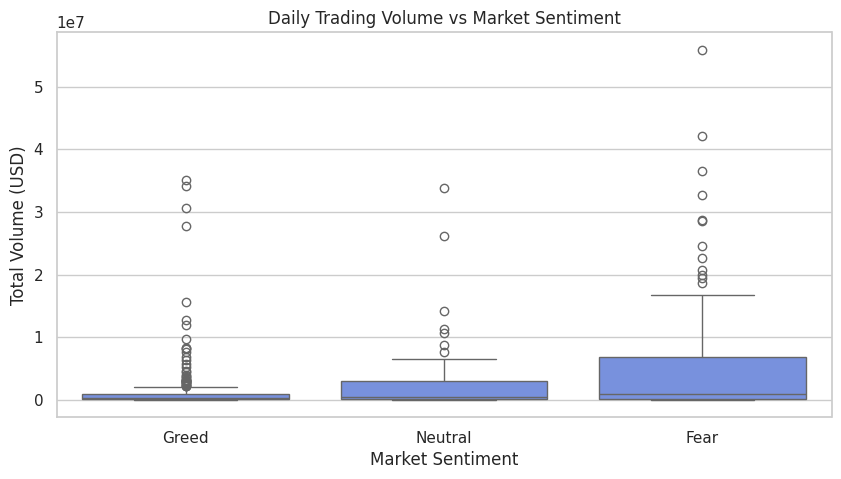

In [35]:
# Distribution of trades under Fear vs Greed
plt.figure(figsize=(10,5))
sns.boxplot(x='sentiment_simple', y='total_volume_usd', data=merged_df)
plt.title("Daily Trading Volume vs Market Sentiment")
plt.ylabel("Total Volume (USD)")
plt.xlabel("Market Sentiment")
plt.savefig("outputs/trading_volume_vs_sentiment.png")
plt.show()

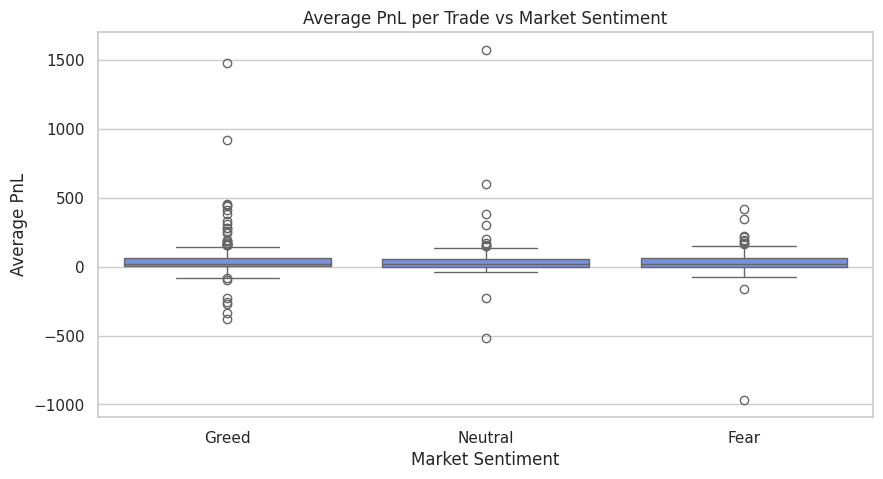

In [36]:
# Average Profit (PnL) under different sentiments
plt.figure(figsize=(10,5))
sns.boxplot(x='sentiment_simple', y='average_pnl', data=merged_df)
plt.title("Average PnL per Trade vs Market Sentiment")
plt.ylabel("Average PnL")
plt.xlabel("Market Sentiment")
plt.savefig("outputs/average_pnl_vs_sentiment.png")
plt.show()

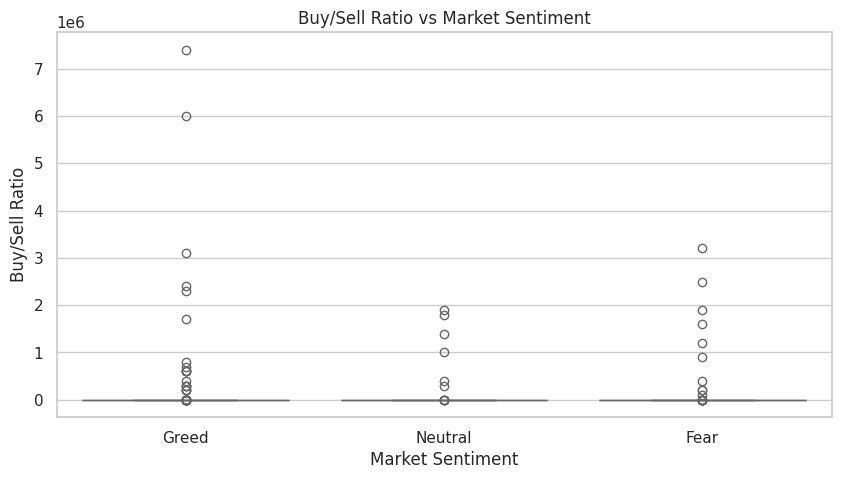

In [37]:
# Buy/Sell ratio vs sentiment
plt.figure(figsize=(10,5))
sns.boxplot(x='sentiment_simple', y='buy_sell_ratio', data=merged_df)
plt.title("Buy/Sell Ratio vs Market Sentiment")
plt.ylabel("Buy/Sell Ratio")
plt.xlabel("Market Sentiment")
plt.savefig("outputs/buy_sell_ratio_vs_sentiment.png")
plt.show()

### ***Additional Insight***

In [38]:
# Top 10 traders by total PnL
top_traders = trader_df.groupby('Account')['Closed PnL'].sum().sort_values(ascending=False).head(10)
print("Top 10 Traders by Total PnL:")
display(top_traders)

Top 10 Traders by Total PnL:


,Closed PnL
Account,
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,2.143383e+06
0x083384f897ee0f19899168e3b1bec365f52a9012,1.600230e+06
0xbaaaf6571ab7d571043ff1e313a9609a10637864,9.401638e+05
0x513b8629fe877bb581bf244e326a047b249c4ff1,8.404226e+05
0xbee1707d6b44d4d52bfe19e41f8a828645437aab,8.360806e+05
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,6.777471e+05
0x72743ae2822edd658c0c50608fd7c5c501b2afbd,4.293556e+05
0x430f09841d65beb3f27765503d0f850b8bce7713,4.165419e+05
0x72c6a4624e1dffa724e6d00d64ceae698af892a0,4.030115e+05
